In [98]:
import pandas
from dateutil.parser import parse

def parse_date(datestr: str):
    """ Extract relevant date details from input string,
        normalize to midnight, return date string YYYY/MM/DD
    """
    dt = parse(datestr, yearfirst=True)
    return dt.timestamp()

df = pandas.read_csv('../data/FIRE_STARTS_PER_ZONE.csv')
df['UNIX_TIMESTAMP'] = df['TIMESTAMP'].map(parse_date)
df = df.set_index('TIMESTAMP')
df



,FIRE_CENTRE,ZONE,COUNT,UNIX_TIMESTAMP
TIMESTAMP,,,,
1950-05-01,2.0,0.0,1,-620758800.0
1950-05-04,2.0,0.0,1,-620499600.0
1950-05-12,2.0,0.0,1,-619808400.0
1950-05-14,2.0,0.0,2,-619635600.0
1950-05-16,2.0,0.0,7,-619462800.0
...,...,...,...,...
1973-09-08,7.0,24.0,2,116319600.0
1973-09-11,7.0,24.0,1,116578800.0
1973-09-16,7.0,24.0,1,117010800.0


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def eval_model(input_df, output_label):
    X=input_df[['FIRE_CENTRE', 'ZONE', 'UNIX_TIMESTAMP']]  # Features
    y=input_df['COUNT']  # Labels

    # Create regression model
    model=RandomForestRegressor(n_estimators=100)

    # Split data, 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3)

    model.fit(X_train, y_train)

    score = model.score(X_train, y_train)
    print(f'--------{output_label}--------') 
    print("R-squared:", score) 

    ypred = model.predict(X_test)

    mse = mean_squared_error(y_test, ypred)
    print("MSE: ", mse)
    print("RMSE: ", mse*(1/2.0))
    print(f'------------------------------') 



In [77]:
# Predict into the future!
# Count of fires in fire centre 1, zone 1 on Sat May 27 2023 04:48:19 GMT+0000
# out = model.predict([[1, 1, 1685162899]])
# out

array([1.02])

In [102]:
last_5_years = df[(df.index > '2017-05-01') & (df.index <= '2022-05-1')]
eval_model(last_5_years, "May 1, 2017 to May 1, 2022")

last_decade = df[(df.index > '2012-05-01') & (df.index <= '2022-05-1')]
eval_model(last_decade, "May 1, 2012 to May 1, 2022")

last_two_decade = df[(df.index > '2002-05-01') & (df.index <= '2022-05-1')]
eval_model(last_two_decade, "May 1, 2002 to May 1, 2022")

last_three_decade = df[(df.index > '1992-05-01') & (df.index <= '2022-05-1')]
eval_model(last_three_decade, "May 1, 1992 to May 1, 2022")


--------May 1, 2017 to May 1, 2022--------
R-squared: 0.8691497306904904
MSE:  6.010539057239057
RMSE:  3.0052695286195283
------------------------------
--------May 1, 2012 to May 1, 2022--------
R-squared: 0.8761612760990077
MSE:  4.185201541677554
RMSE:  2.092600770838777
------------------------------
--------May 1, 2002 to May 1, 2022--------
R-squared: 0.8747803370774166
MSE:  6.6393791878172586
RMSE:  3.3196895939086293
------------------------------
--------May 1, 1992 to May 1, 2022--------
R-squared: 0.8721431292865001
MSE:  8.401351491008421
RMSE:  4.200675745504211
------------------------------


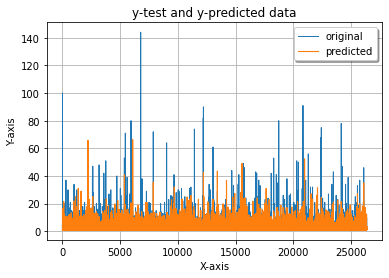

In [37]:
import matplotlib.pyplot as plt

#Plot
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 